<a href="https://colab.research.google.com/github/Narimanzk/Yelp/blob/main/Yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Data Analysis

## Introduction

## Preparation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from subprocess import check_output
from subprocess import check_output

In [ ]:
rcParams['figure.figsize'] = 12, 4
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)
#print(check_output(["ls", "drive/MyDrive/yelp_dataset"]).decode("utf8"))
print(check_output(["ls", "Downloads/yelp_dataset"]).decode("utf8"))

Dataset_User_Agreement.pdf
yelp_academic_dataset_business.json
yelp_academic_dataset_checkin.json
yelp_academic_dataset_review.json
yelp_academic_dataset_tip.json
yelp_academic_dataset_user.json



## Business Data

In [ ]:
#business = pd.read_json('drive/MyDrive/yelp_dataset/yelp_academic_dataset_business.json', lines=True)
business = pd.read_json('Downloads/yelp_dataset/yelp_academic_dataset_business.json', lines=True)

In [ ]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
business.shape

(150346, 14)

In [ ]:
#Null Values
business.isnull().sum().sort_values(ascending=False)

hours           23223
attributes      13744
categories        103
business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
dtype: int64

In [ ]:
business.head(5)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Review Data

In [ ]:
#reviews = pd.read_json('drive/MyDrive/yelp_dataset/yelp_academic_dataset_review.json', lines=True)
reviews = pd.read_json('Downloads/yelp_dataset/yelp_academic_dataset_review.json', lines=True)

In [ ]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
reviews.shape

(6990280, 9)

In [ ]:
#Null Values
reviews.isnull().sum().sort_values(ascending=False)

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
reviews.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## Most Popular Business Categories

<AxesSubplot:>

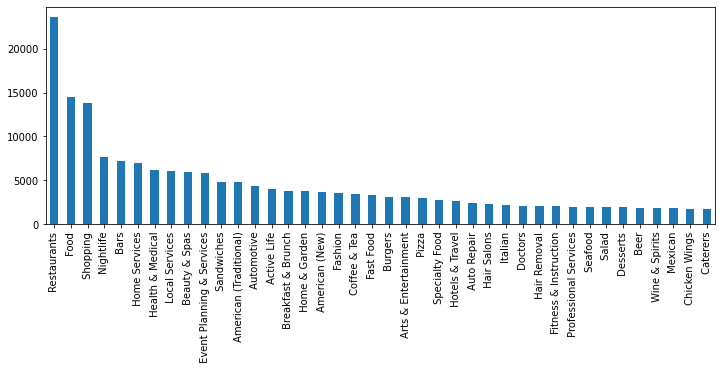

In [ ]:
has_category = business.dropna(subset='categories')
pd.Series(' '.join(has_category['categories']).split(",")).value_counts()[:40].plot(kind='bar', y='Number of businesses')


## Top 10 Most Reviewed and High Rating Restaurants

In [ ]:
top_reviewed = has_category[['categories','name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")
top_reviewed[(top_reviewed['categories'].str.contains('Restaurants'))].head(10).sort_values(ascending=False, by="stars")


,categories,name,review_count,city,stars
91757,"American (Traditional), Chicken Shop, Southern...",Hattie B’s Hot Chicken - Nashville,6093,Nashville,4.5
143157,"Candy Stores, Shopping, Department Stores, Fas...",Reading Terminal Market,5721,Philadelphia,4.5
147081,"Restaurants, American (Traditional), American ...",Ruby Slipper - New Orleans,5193,New Orleans,4.5
31332,"French, Restaurants, Cocktail Bars, Nightlife,...",Commander's Palace,4876,New Orleans,4.5
113731,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",Acme Oyster House,7568,New Orleans,4.0
112552,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",Oceana Grill,7400,New Orleans,4.0
31033,"American (New), Restaurants, Sandwiches, Seafo...",Royal House,5070,New Orleans,4.0
4497,"German, Restaurants, Seafood, Cocktail Bars, F...",Luke,4554,New Orleans,4.0
97331,"Cajun/Creole, Seafood, Restaurants",Cochon,4421,New Orleans,4.0
100024,"Cajun/Creole, Restaurants, Event Planning & Se...",Mother's Restaurant,5185,New Orleans,3.5


## Top 10 Cities with the most Businesses

In [ ]:
city_business_counts = business[['city', 'business_id']].groupby(['city'])\
['business_id'].agg('count').sort_values(ascending=False)

In [ ]:
city_business_counts = pd.DataFrame(data=city_business_counts)
city_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

Text(0.5, 1.0, 'Top 10 cities with the most businesses listed')

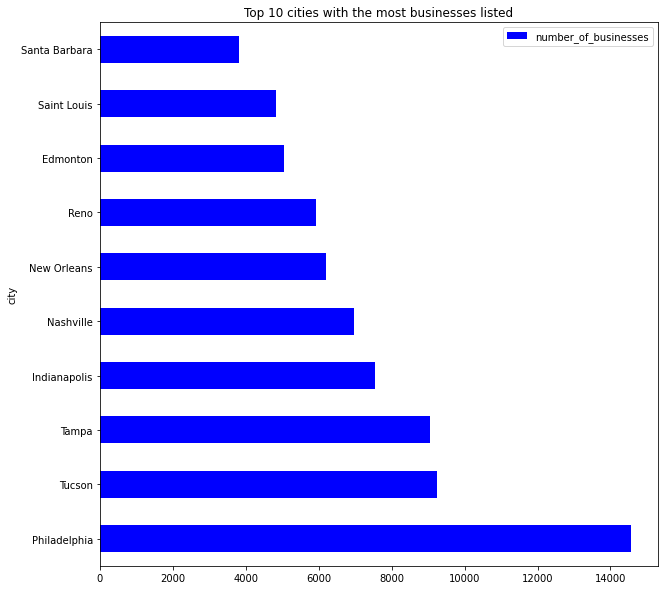

In [ ]:
city_business_counts[0:10].sort_values(ascending=False, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10,10], colormap='winter')
plt.title('Top 10 cities with the most businesses listed')